## Context Questionnaire

## Import packages 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *

## Preprocessing 

In [2]:
# Data set loading
df_file = 'E:/HumanA/Data/Data_Tracy/Questionnaires/ContextQuest.csv'
df = pd.read_csv(df_file, sep= ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Timestamp                                                                           20 non-null     object
 1   ID                                                                                  20 non-null     int64 
 2   1. The avatars increased my feeling of presence in the Virtual environment. ​       20 non-null     int64 
 3   2. The Virtual environment was more natural with avatars in it.                     20 non-null     int64 
 4   ​3. I felt like I was with other people in the city                                 20 non-null     int64 
 5   4. The exploration of the virtual town felt similar to exploring a real world city  20 non-null     int64 
dt

In [3]:
df.tail()

,Timestamp,ID,1. The avatars increased my feeling of presence in the Virtual environment. ​,2. The Virtual environment was more natural with avatars in it.,​3. I felt like I was with other people in the city,4. The exploration of the virtual town felt similar to exploring a real world city
15,2/23/2023 11:07:21,7393,3,5,2,6
16,2/28/2023 12:25:18,5161,7,6,5,6
17,3/10/2023 11:37:53,5851,5,6,1,5
18,3/30/2023 14:19:01,1843,6,6,3,3
19,4/18/2023 11:06:42,3540,2,2,3,5


In [4]:
#Renaming the column names 
column_names = ['timeStamp', 'ID', 'item1', 'item2', 'item3', 'item4']
df.columns = column_names
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timeStamp  20 non-null     object
 1   ID         20 non-null     int64 
 2   item1      20 non-null     int64 
 3   item2      20 non-null     int64 
 4   item3      20 non-null     int64 
 5   item4      20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [5]:
# From a wide format to a long format 
Long = pd.melt(df, id_vars=['ID'], value_vars=['item1', 'item2', 'item3', 'item4'], var_name='item', value_name='likert')
Long.head()

,ID,item,likert
0,9627,item1,4
1,4598,item1,5
2,1031,item1,6
3,8629,item1,4
4,4847,item1,3


In [6]:
# Calculating the average for all context items 
df['ContextQ_average'] = df[['item1','item2']].mean(axis=1)
df.head()

,timeStamp,ID,item1,item2,item3,item4,ContextQ_average
0,11/17/2022 17:32:14,9627,4,6,2,6,5.0
1,11/21/2022 15:26:47,4598,5,6,4,4,5.5
2,11/22/2022 15:48:55,1031,6,7,2,4,6.5
3,11/24/2022 11:50:24,8629,4,5,2,3,4.5
4,11/25/2022 9:45:38,4847,3,6,5,2,4.5


## Write CSV file

In [7]:
os.chdir('E:/HumanA/Data/Data_Tracy/Questionnaires/Adjusted')
df.to_csv('ContextQuest.csv')

In [8]:
df.describe()

,ID,item1,item2,item3,item4,ContextQ_average
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,5624.300000,4.450000,4.850000,3.300000,4.50000,4.650000
std,2357.904067,1.605091,1.755443,1.719853,1.60591,1.556819
min,1031.000000,2.000000,2.000000,1.000000,1.00000,2.000000
25%,4575.500000,3.750000,3.000000,2.000000,3.75000,3.875000
50%,5754.500000,4.000000,5.500000,3.000000,5.00000,4.500000
75%,7159.000000,5.250000,6.000000,5.000000,6.00000,6.000000
max,9627.000000,7.000000,7.000000,7.000000,7.00000,7.000000


## Data Visualization

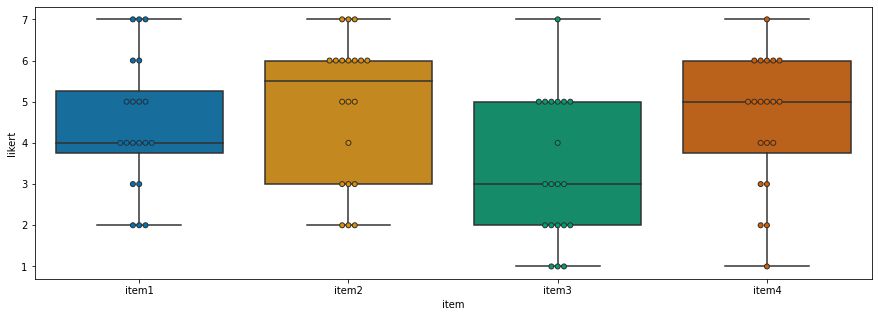

In [9]:
sns.set_palette('colorblind')
dy='item'; dx='likert'; ort='H';  sigma = .2
#Change y axist from 1 to seven
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= Long, x=dy, y=dx, ax=ax)
sns.swarmplot(data= Long, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()

In [10]:
LongAv = pd.melt(df, id_vars=['ID'], value_vars=['ContextQ_average'], var_name='item', value_name='likert')
LongAv.head()

,ID,item,likert
0,9627,ContextQ_average,5.0
1,4598,ContextQ_average,5.5
2,1031,ContextQ_average,6.5
3,8629,ContextQ_average,4.5
4,4847,ContextQ_average,4.5


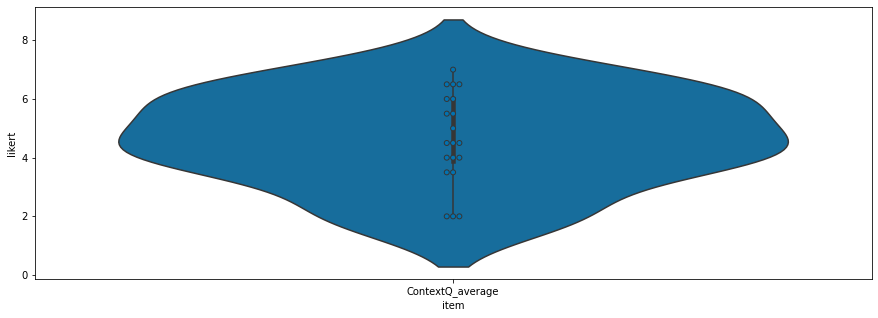

In [11]:
dy='item'; dx='likert'; ort='H'; pal = sns.set_palette('colorblind'); sigma = .2

fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data= LongAv, x=dy, y=dx, ax=ax)
sns.swarmplot(data= LongAv, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()